## 패키지 및 데이터 불러오기 

In [1]:
import numpy as np   # numpy 패키지 불러오기 
import pandas as pd  # pandas 패키지 불러오기 
import matplotlib  # matplotlib 패키지 불러오기 
import matplotlib.pyplot as plt # 그래프 시각화를 위한 패키지 불러오기
import seaborn as sns  # seaborn 패키지 불러오기 
import warnings        # warings(경고 메시지 없애주는)패키지 불러오기 
from matplotlib import font_manager, rc  # matplotlib안 한글 깨짐 처리
import platform   # 현재 사용하고 있는 시스템 유형을 알려주는 패키지 
import plotly.express as px  # 더 나은 시각화를 위해 plotly 패키지 불러오기 

# 운영체제에 맞게 폰트 설정
if platform.system() == "Windows":
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgubn.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 기호 표시
warnings.filterwarnings(action='ignore') # 경고 매세지 강제로 없애주는 설정


# dataset load
data = pd.read_csv('./TV_GRPs_by_models.csv')
data = data.drop(['Unnamed: 0'],1)


#preprocessing
# 광고주를 기준으로 광고횟수, GRP, 도달자수, 시청자수를 각각 더함.
idx_ad = data[["Advertiser","GRP","광고횟수","도달자수","시청자수"]].groupby("Advertiser").sum()
# 평균 시청률 
data['평균시청률'] = data['GRP'] / data['광고횟수']
# 평균 노출빈도 구하기 
data['평균노출빈도'] = data['GRP'] / data['도달율 1+']
data['평균노출빈도'].fillna(0, inplace=True)
data['평균노출빈도'].replace(np.inf, 0, inplace=True)
# 광고주와 연령대를 기준으로 그룹화 (평균 기준)
ad_age = data.groupby(["Advertiser", "연령대"]).agg('mean').round(6)[['GRP', '평균시청률', '평균노출빈도']].reset_index()
# 연령대와 광고년도를 기준으로 그룹을 묶어 평균으로 연산 
## 월 행은 삭제 
age_df = data.groupby(['연령대','Year']).mean().round(2).reset_index()
age_df.drop('Month',axis=1,inplace=True)
# 광고주, Product, 연도, 연령대별 광고횟수, GRP, 도달지수, 시청자수
apya = data[["Advertiser","Product","Year","연령대", "광고횟수","GRP","도달자수","시청자수"]].copy().groupby(["Advertiser","Product","Year","연령대"]).mean().reset_index()
apya = apya.astype({"도달자수":int, "시청자수":int})
apya = apya.drop(apya[apya["연령대"]=="개인"].index)

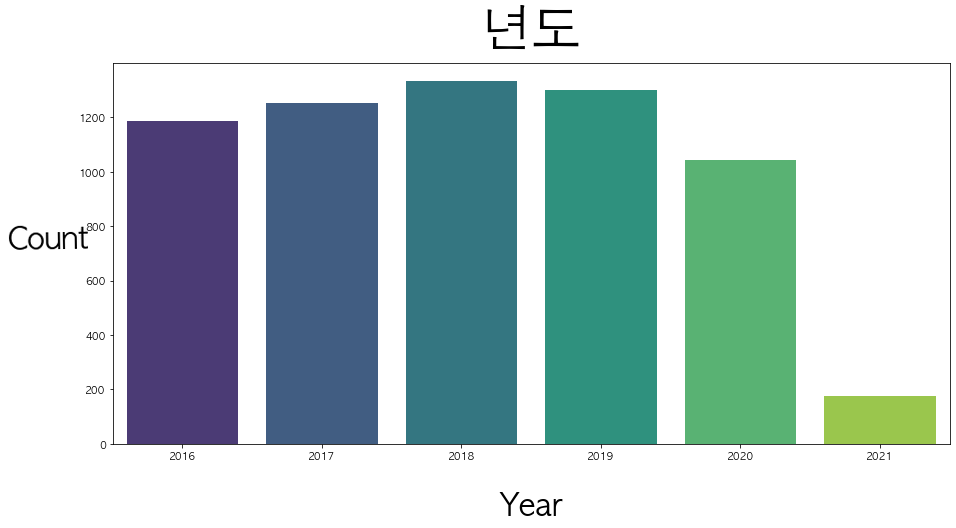

In [2]:
# graph
from Plot import Plot
plot = Plot()

# 연도별 광고 횟수
plot.countplot(data, "년도", "Year")

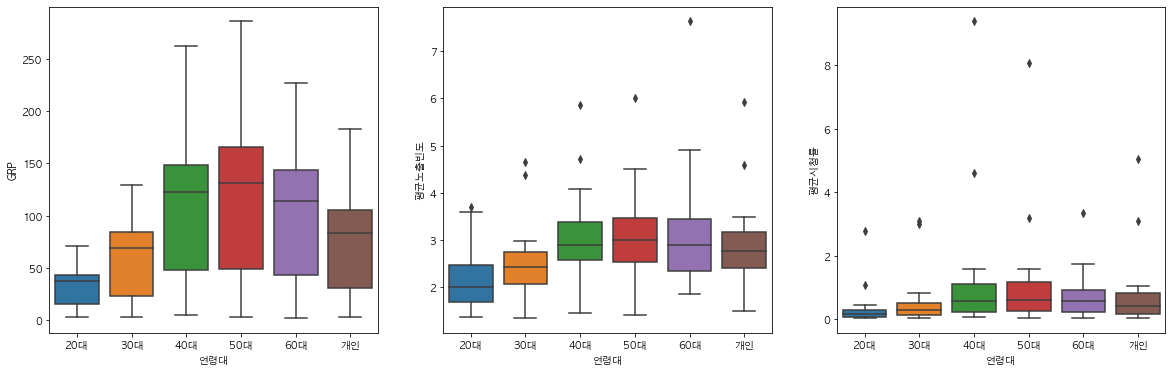

In [3]:
#연령별 GRP, 연령별 평균노출빈도, 연령별 평균시청률
plot.boxplot(ad_age, '연령대', 'GRP', inplacesubplot=131) # inplacesubplot을 설정 O
plot.boxplot(ad_age, '연령대', '평균노출빈도', inplacesubplot=132)
plot.boxplot(ad_age, '연령대', '평균시청률', inplacesubplot=133)
plot.showplot() # inplacesubplot으로 모아서 한번에 출력 가능

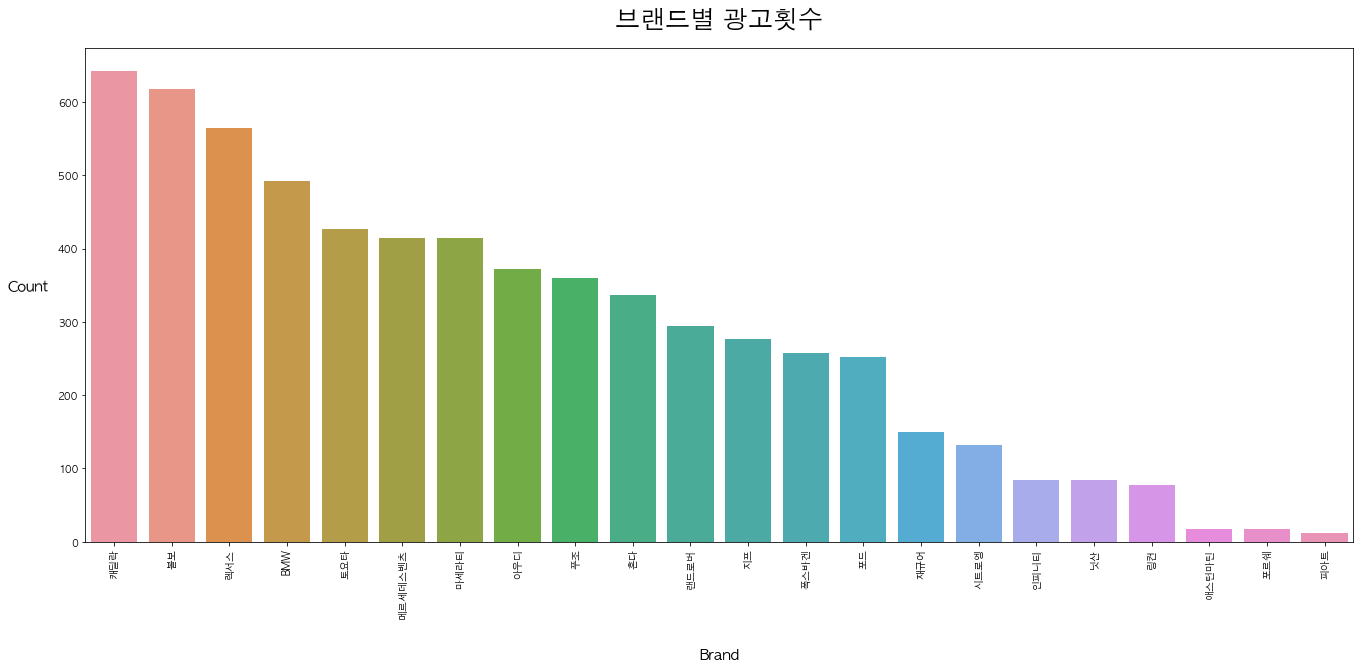

In [4]:
# 브랜드별 광고 횟수
import graph
graph.ad_brand(data, 'Brand')

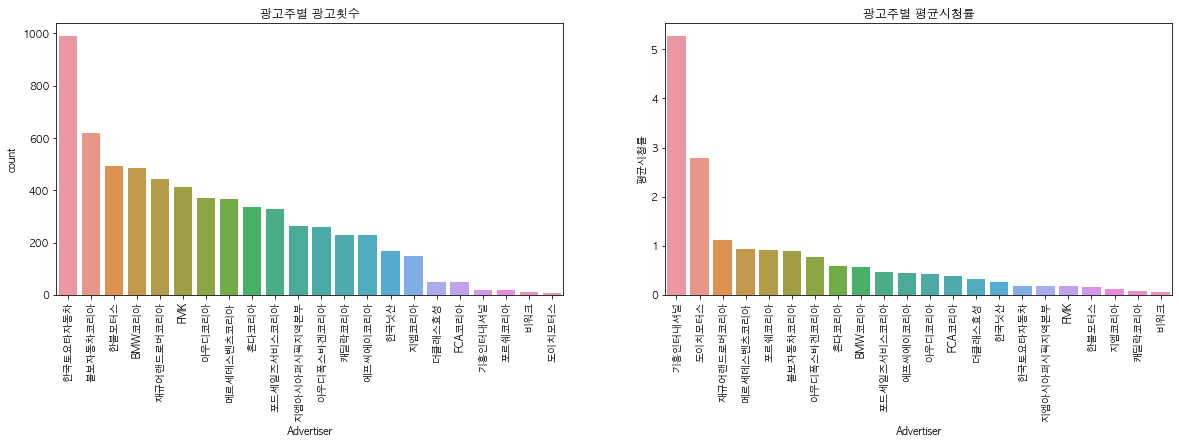

In [5]:
# 광고주별 광고횟수, 광고주별 평균시청률
graph.advertiser(data, "Advertiser")

In [20]:
# 브랜드별 도달자수&시청자수그리프 표현 
fig = px.scatter(idx_ad, 
                 size=idx_ad['GRP'],
                 x=idx_ad['광고횟수'], 
                 y=idx_ad['도달자수'],
                 color=idx_ad.index, 
                 labels={'x':"광고횟수", 'y':"도달자수", 'species':"Brand"})
fig.show();

In [7]:
# 연령대별 GRP 분포
px.box(data_frame=age_df, x='연령대', y='GRP', title="연령대별 GRP")

In [8]:
# 연령대별 도달률 1+ 분포
px.box(data_frame=age_df, x='연령대', y='도달율 1+', title="연령대별 도달률 1+")

In [9]:
# 연령대별 도달률 3+ 분포
px.box(data_frame=age_df, x='연령대', y='도달율 3+', title="연령대별 도달률 3+")

In [10]:
# 연령대별 도달률 5+ 분포
px.box(data_frame=age_df, x='연령대', y='도달율 5+', title="연령대별 도달률 5+")

In [11]:
#(광고주)시청자별 도달지수
fig = px.scatter(apya, 
                 size=apya['GRP'],
                 y='도달자수', 
                 x='시청자수',
                 color='Advertiser', 
                 labels={'x':"시청자수",'y':"도달자수"})
fig.show()

In [12]:

































































































[
    
    #(광고주,연령대)광고횟수별 도달지수
fig = px.scatter(apya, x="광고횟수", y="도달자수", animation_frame="Year", animation_group="Advertiser",
           size="GRP", color="Advertiser", hover_name="Advertiser", facet_col="연령대",
           size_max=30, range_x=[-100, 2500], range_y=[1,4000000])
fig.show()